 #Thuật toán streaming kmean

 -Là một phương pháp được sử dụng trong phân tích tính chất của cụm dữ liệu. Nó đặc biệt được sử dụng nhiều trong khai phá dữ liệu và thống kê. nó phân vùng dữ liệu thành các k cụm khác nhau. Giải thuật này giúp chúng ta xác định được dữ liệu của chúng ta thuộc về nhóm nào

Triển khai code

In [ ]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách



In [ ]:
means = [[2, 2], [9, 2], [4, 9],[9,8]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 4
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X3 = np.random.multivariate_normal(means[3], cov, n_samples)
X = np.concatenate((X0, X1, X2, X3), axis = 0)

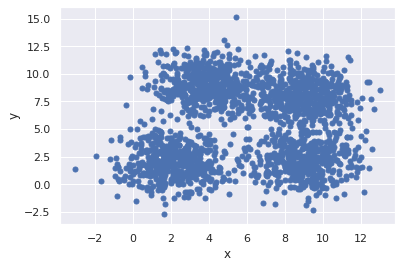

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

**Khởi tạo các tâm cụm**

Ở đây, tôi khởi tạo n_cluster tâm cụm bằng cách lấy ngẫu nhiên n_cluster điểm dữ liệu của tập dữ liệu. Bạn có thể lấy tọa độ nào đó không thuộc vào tệp dữ liệu. Nhưng hãy lưu ý đến: “Việc khởi tạo vị trí của k tâm cụm cũng rất quan trọng” tôi đã nói ở trên.

In [ ]:
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

**Xác định các tâm cụm**

Với mỗi điểm dữ liệu trong tập dữ liệu, tâm cụm của nó sẽ là 1 trong số n_cluster tâm cụm gần với nó nhất. Việc tính toán khoảng cách giữa 2 điểm trong bài này sử dụng Euclidean distance. Công thức này bạn vẫn thường sử dụng để tính khoảng cách giữa hai điểm khi biết tọa độ hồi cấp 3. Ngoài ra còn có rất nhiều công thức tính khoảng cách khác nữa.

In [ ]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)
 

**Cập nhật lại vị trí của các tâm cụm**

Việc tính toán lại tọa độ của mỗi tâm cụm được thực hiện đơn giản bằng cách lấy trung bình cộng tọa độ của tất cả các điểm dữ liệu của cụm. Sau khi tính toán xong, vị trí mới của tâm cụm sẽ nằm chính giữa cụm của nó.

In [ ]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

**Kiểm tra tính hội tụ**

Nếu việc cập nhật lại vị trí của các tâm cụm không có thay đổi gì thì có nghĩa là chúng ta đã có thể dừng và đưa ra kết quả. Nghĩa là tọa độ cũ và tọa độ sau khi cập nhật của các tâm cụm là như nhau. Trong trường hợp này, nếu bạn có tiếp tục chạy nữa thì cũng sẽ không thay đổi gì.

In [ ]:
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

Để các bạn có thể thấy rõ cách hoạt động của thuật toán, hãy bổ sung thêm hàm visualize này.

Sau mỗi lần cập nhật tâm cho từng điểm dữ liệu, hoặc cập nhật lại tọa độ của các tâm. Hãy gọi hàm này để xem sự thay đổi của vị trí tâm và tâm của các điểm dữ liệu. Kết quả sẽ được vẽ lên đồ thị để bạn dễ quan sát.

In [ ]:
# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k <= 4
# Nếu bạn thay đổi k > 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

Toàn bộ thuật toán k-means

In [ ]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)


Bạn đầu, chúng ta sẽ khởi tọa độ cho các tâm cụm. Khởi tạo tất cả các điểm dữ liệu thuộc cụm 0(tùy chọn).

Lặp lại việc tìm tâm cụm cho các điểm dữ liệu, cập nhật tọa độ tâm cụm cho tới khi tọa độ của các tâm cụm không còn thay đổi nữa.

Do bài toán này khá đơn giản, nên việc giải chỉ mất vài lần lặp.

Chúng ta sẽ gọi hàm kmeans_visualize sau mỗi lần gán lại tâm cụm cho từng điểm dữ liệu hoặc tính toán lại tọa độ các tâm cụm.

Bây giờ, việc ta cần làm là khởi tạo tọa độ tâm các cụm. Và sau đó gọi hàm kmeans phía trên để thực thi.

[[10.47088043  3.27975792]
 [ 6.795763    1.16743526]
 [ 8.91743187  6.56888614]
 [ 2.96453716  1.84511949]]


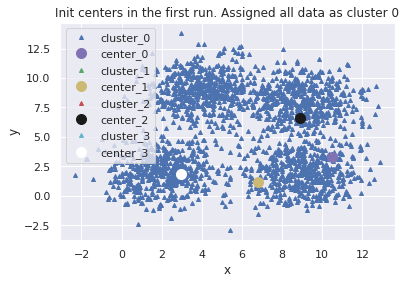

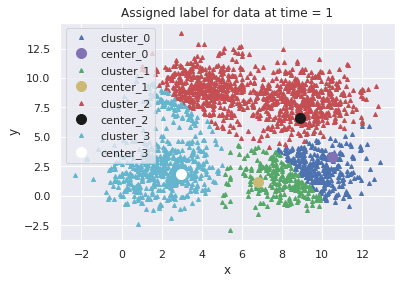

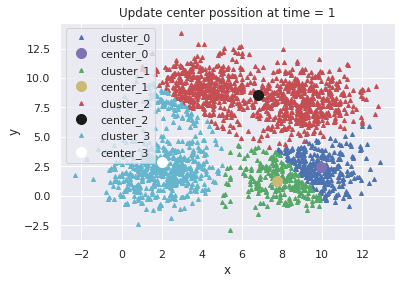

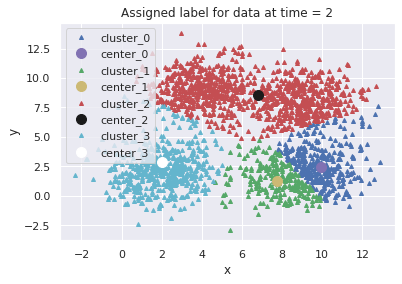

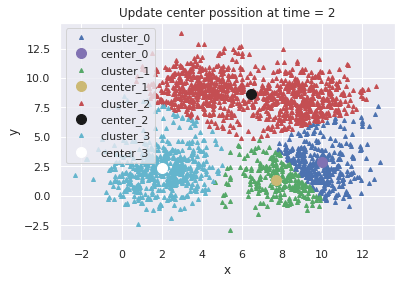

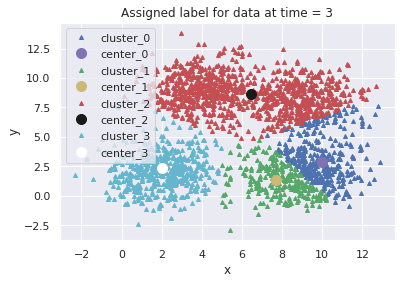

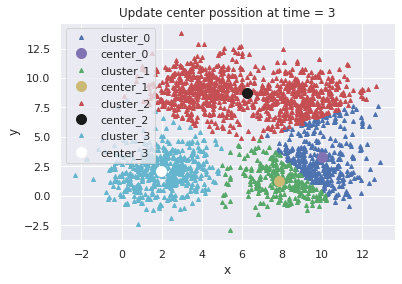

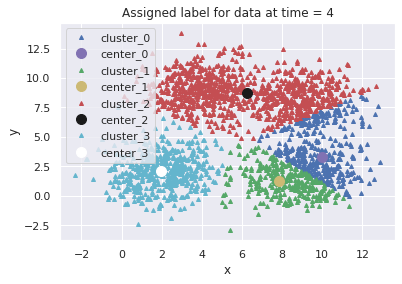

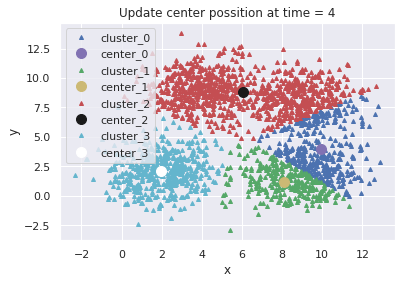

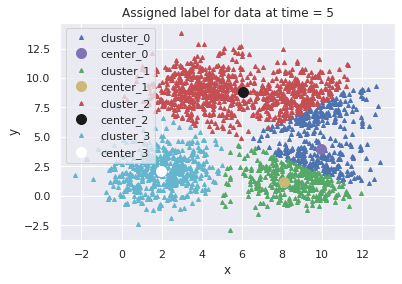

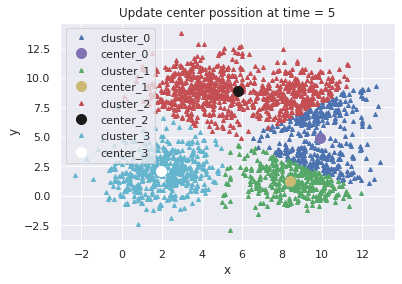

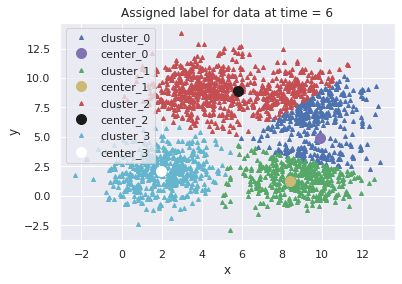

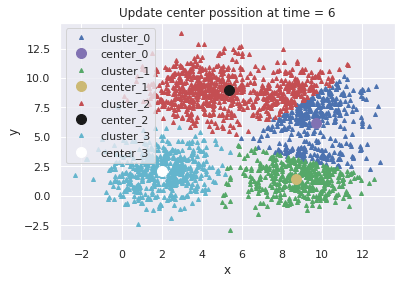

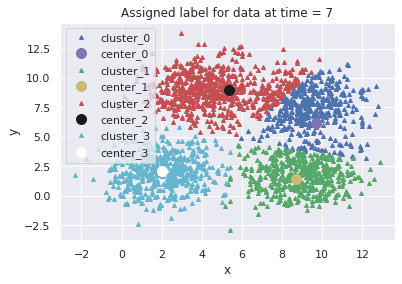

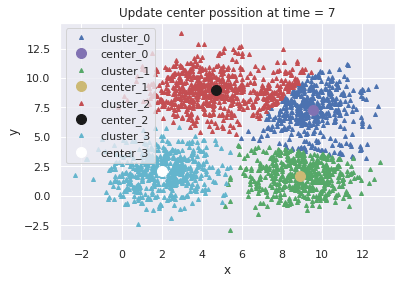

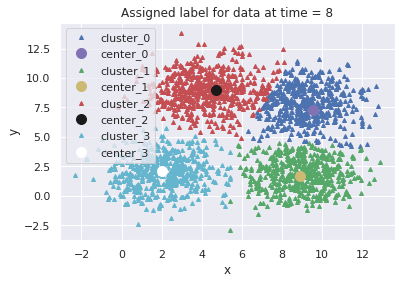

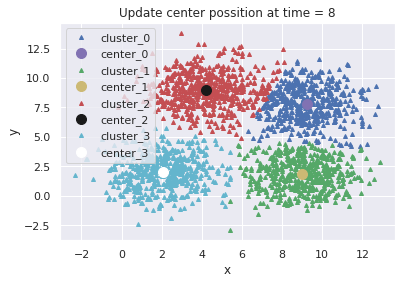

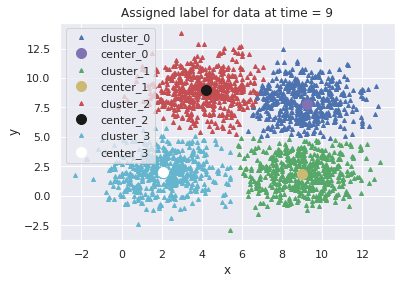

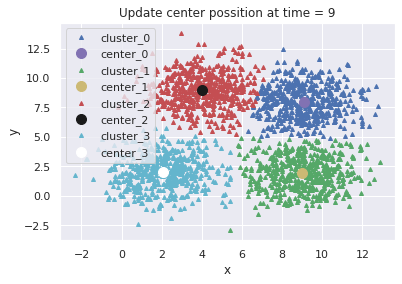

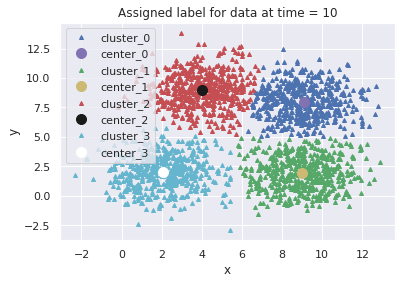

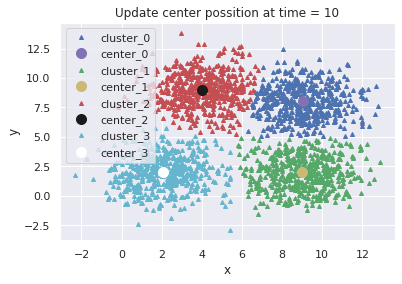

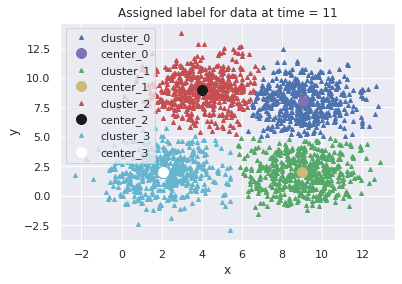

Done! Kmeans has converged after 10 times


In [ ]:
  init_centers = kmeans_init_centers(X, n_cluster)
  print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
  init_labels = np.zeros(X.shape[0])
  kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
  centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
 
  print('Done! Kmeans has converged after', times, 'times')

in gia tọa độ của các tâm cụm

In [ ]:
print(centers)

[[9.04046982 8.01513402]
 [9.01156341 1.97993025]
 [3.9832044  9.01286475]
 [2.07193414 2.03338754]]
